In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

import seaborn
seaborn.set_context('talk')
#from sqlalchemy import create_engine
import sqlalchemy as sa
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, select


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2024*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [4]:
import plotly
plotly.__version__


'5.22.0'

In [5]:

melb_df = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [7]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Ejercicio 1 SQL:

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



## Respueta Ejercicio 1 SQL

**1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite**  

Creamos el motor de la base de datos al que llamamos "dbdiplo"

In [8]:
engine = create_engine('sqlite:///dbdiplo.db', echo=False) 

**2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.**

In [9]:
#Creamos la tabla melb, que se contiene los datos del precio de las propiedades en Melboure 
melb_df.to_sql('melb', con=engine, if_exists="replace")

13580

In [10]:
query1 = "SELECT * FROM melb ORDER BY Price DESC"

pandas.read_sql_query(query1, engine)

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,12094,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,29/07/2017,18.8,...,1.0,1.0,744.0,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0
1,7692,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,13/05/2017,9.0,...,5.0,4.0,2079.0,464.3,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265.0
2,9575,Hawthorn,49 Lisson Gr,4,h,7650000.0,S,Abercromby's,17/06/2017,5.3,...,2.0,4.0,1690.0,284.0,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308.0
3,3616,Kew,15 Barry St,6,h,6500000.0,S,Jellis,13/08/2016,5.6,...,6.0,3.0,1334.0,365.0,1890.0,Boroondara,-37.80290,145.02670,Southern Metropolitan,10331.0
4,12557,Middle Park,136 Page St,5,h,6400000.0,S,Marshall,9/09/2017,3.0,...,2.0,1.0,553.0,308.0,1920.0,None,-37.84908,144.95753,Southern Metropolitan,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,7940,Hawthorn,17/17 Park St,1,u,160000.0,VB,HAR,8/04/2017,4.6,...,1.0,0.0,322.0,NaN,2009.0,Boroondara,-37.81980,145.03730,Southern Metropolitan,11308.0
13576,1927,Coburg,171 Moreland Rd,4,h,145000.0,PI,Jellis,4/06/2016,7.8,...,1.0,1.0,536.0,164.0,1910.0,Moreland,-37.75550,144.96580,Northern Metropolitan,11204.0
13577,7303,Albion,8/6 Ridley St,1,u,145000.0,PI,Biggin,28/05/2016,13.9,...,1.0,1.0,36.0,NaN,NaN,Brimbank,-37.78330,144.82660,Western Metropolitan,2185.0
13578,1805,Caulfield,30 Pyne St,4,h,131000.0,PI,Rodney,25/02/2017,8.9,...,1.0,2.0,499.0,155.0,1920.0,Glen Eira,-37.88640,145.02420,Southern Metropolitan,2379.0


Ahora vamos a cargar los datos de Airbnb que vimos en clase

In [11]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

C:\Users\josez\AppData\Local\Temp\ipykernel_14828\172457013.py:9: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pandas.read_csv(


In [12]:
airbnb_df[:3]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


In [13]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   description            22563 non-null  object 
 1   neighborhood_overview  14424 non-null  object 
 2   street                 22895 non-null  object 
 3   neighborhood           17082 non-null  object 
 4   city                   22895 non-null  object 
 5   suburb                 22872 non-null  object 
 6   state                  22834 non-null  object 
 7   zipcode                22753 non-null  object 
 8   latitude               22895 non-null  float64
 9   longitude              22895 non-null  float64
 10  price                  22895 non-null  int64  
 11  weekly_price           2524 non-null   float64
 12  monthly_price          1891 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 2.3+ MB


In [14]:
#Creamos la tabla airbnb en la base de datos
airbnb_df.to_sql('airbnb', con=engine, if_exists="replace")

22895

In [15]:
query1 = "SELECT * FROM airbnb ORDER BY price DESC"

pandas.read_sql_query(query1, engine)

,index,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,5636,"Close to Train, Tram, Bikepaths. 13km from Mel...",None,"Reservoir, VIC, Australia",Preston,Darebin,Reservoir,VIC,3073,-37.724889,144.997307,12624,NaN,NaN
1,19536,None,None,"Berwick, VIC, Australia",None,Casey,Berwick,VIC,3806.0,-38.052419,145.348927,12501,NaN,NaN
2,8119,"我的房源靠近Queen Victoria Market ,RMIT, UNIMELB, AL...",None,"Melbourne, VIC, Australia",Central Business District,Melbourne,Melbourne,VIC,3000,-37.806440,144.962038,9000,NaN,NaN
3,7872,We are young couples and our unit is near the ...,None,"Kew East, VIC, Australia",Kew,Boroondara,Kew East,VIC,3102,-37.785660,145.062014,8000,NaN,NaN
4,20418,Ease into the prestigious location and luxurio...,Wisteria Place is surrounded by open spaces lo...,"South Yarra, VIC, Australia",South Yarra,Stonnington,South Yarra,VIC,3141.0,-37.840319,145.003489,4445,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22890,12365,My place is close to Gardiner Creek parks; wal...,None,"Glen Iris, VIC, Australia",Glen Iris,Boroondara,Glen Iris,VIC,3146.0,-37.865661,145.067799,0,NaN,NaN
22891,12491,Newly built modern stylish Townhouse in Chelte...,None,"Cheltenham, VIC, Australia",None,Bayside,Cheltenham,VIC,3192.0,-37.960241,145.040943,0,NaN,NaN
22892,12556,T T,None,"Airport West, VIC, Australia",None,Moonee Valley,Airport West,Victoria,3042.0,-37.721064,144.885335,0,NaN,NaN
22893,12670,These apartments are recently renovated with n...,None,"Carlton, VIC, Australia",Carlton,Melbourne,Carlton,VIC,3053.0,-37.805322,144.963948,0,NaN,NaN


Las siguientes lineas de codigo me permiter consultar las tablas generadas en la base de datos

In [16]:
metadata = MetaData()
metadata.reflect(bind=engine)
table_names = metadata.tables.keys()
print("Tables in the database:")
for table_name in table_names:
    print(table_name)

Tables in the database:
airbnb
melb


**3. Implementar consultas en SQL que respondan con la siguiente información:**


- cantidad de registros totales por ciudad.

In [17]:
query1 = "SELECT city, COUNT(*) FROM airbnb GROUP BY city ORDER BY COUNT(*) DESC"
pandas.read_sql_query(query1, engine)

,city,COUNT(*)
0,Melbourne,7368
1,Port Phillip,2808
2,Yarra,2049
3,Stonnington,1621
4,Moreland,967
5,Yarra Ranges,771
6,Darebin,698
7,Boroondara,664
8,Glen Eira,631
9,Whitehorse,614


-  cantidad de registros totales por barrio y ciudad.

In [18]:
query2 = "SELECT neighborhood, city, COUNT(*) FROM airbnb GROUP BY city, neighborhood ORDER BY COUNT(*) DESC"
pandas.read_sql_query(query2, engine)

,neighborhood,city,COUNT(*)
0,Central Business District,Melbourne,3726
1,Southbank,Melbourne,1204
2,St Kilda,Port Phillip,1082
3,None,Yarra Ranges,771
4,South Yarra,Stonnington,759
...,...,...,...
129,Bentleigh,Bayside,1
130,Elwood,Bayside,1
131,South Melbourne,Melbourne,1
132,Kensington,Moonee Valley,1


**4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.**

In [19]:
#Dataframe del precio de las propiedades de Melboure
melb_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [20]:
#Dataframe del precio del alquiler de las propiedades en Airbnb
airbnb_df.head()

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,-37.758971,144.989228,50,250.0,920.0
4,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,-37.864530,144.992238,69,400.0,1900.0


**Vamos a hacer la consulta usando el codigo postal como punto en comun, vamos a normalizar el valor de codigo postal en ambas tablas a INT y vamos a mostrar los precios promedio**

In [21]:
airbnb_df.zipcode.value_counts()

zipcode
3000.0        2491
3000           876
3006.0         860
3182.0         579
3182           556
              ... 
3096             1
3812             1
3000\n3000       1
3752             1
4068.0           1
Name: count, Length: 463, dtype: int64

In [22]:
melb_df.Postcode.value_counts()

Postcode
3073.0    359
3020.0    306
3121.0    292
3040.0    290
3046.0    284
         ... 
3340.0      1
3158.0      1
3808.0      1
3777.0      1
3793.0      1
Name: count, Length: 198, dtype: int64

In [23]:
query3 = "SELECT * FROM melb LEFT JOIN (SELECT CAST(zipcode AS int) as zipcode_int, AVG(airbnb.price) AS airbnb_price_mean, COUNT(zipcode) AS airbnb_record_count, AVG(weekly_price) AS airbnb_weekly_price_mean, AVG(monthly_price) AS airbnb_monthly_price_mean FROM airbnb GROUP BY zipcode_int) AS airbnb_price_by_zipcode ON airbnb_price_by_zipcode.zipcode_int = CAST(melb.Postcode AS INT)"
resultado = pandas.read_sql_query(query3, engine)
resultado[:50]

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode_int,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
5,5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,...,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
6,6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,...,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
7,7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,...,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
8,8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,...,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
9,9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,...,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258


## Ejercicio 2 - Pandas:

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.


2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

## Respuesta Ejercicio 2 - Pandas:

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

Primero hacemos una inspección del data set para ubicarnos con las features con las que contamos, tipo de variables y valores faltantes.

In [24]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

**Descripción de algunas variables específicas**

Rooms: Número de habitaciones

Price: Precio en dolares

Método: S - propiedad vendida; SP - propiedad vendida antes; PI - propiedad pasada; PN - vendido antes no divulgado; SN - vendido no divulgado; NB - sin oferta; VB - oferta del vendedor; W - retirado antes de la subasta; SA - vendido después de una subasta; SS - vendido después del precio de la subasta no revelado. N/A: el precio o la oferta más alta no están disponibles.

Type: br - dormitorio(s); h - casa, cabaña, villa, semi, terraza; u - unidad, dúplex; t - casa adosada; dev site - sitio de desarrollo; o res - otros residenciales.

SellerG: Agente inmobiliario (vendedor)

Date: Fecha de venta

Distance: Distancia desde CDB (distrito central de negocios de Melbourne)

Regionname : Región general (oeste, noroeste, norte, noreste, etc.)

Propertycount: Número de propiedades que existen en el suburbio.

Bedroom2: número de dormitorios (de una fuente diferente, Scraping)

Bathroom : Número de Baños

Car: número de cocheras

Landsize: Tamaño del terreno

BuildingArea: tamaño del edificio

CouncilArea:  Consejo de gobierno de la zona

Vamos a clasificar las variables según sean numéricas o categóricas:

In [25]:
#variables categóricas

categorical = [var for var in melb_df.columns if melb_df[var].dtype=='O'] 
categorical

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

In [26]:
#RESUMEN PARA VARIABLES CATEGÓRICAS
melb_df.describe(include='O')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


In [27]:
# variables numéricas
numerical = [var for var in melb_df.columns if (melb_df[var].dtype == float) or (melb_df[var].dtype == int)]
numerical

['Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [28]:
#RESUMEN PARA VARIABLES NUMÉRICAS
round(melb_df.describe(),2)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


Para comenzar a seleccionar las variables relevantes en primera medida nos interesa saber el porcentaje de valores faltantes en nuestro conjunto de datos:

In [29]:
melb_df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Notemos que sólo algunas variables contienen valores faltantes. En el caso de BuildingArea y YearBuilt el porcentaje de estos valores es elevado, mientras que para la variable Car el porcentaje no es muy significativo.

Para la elección de variables cuantitativas utilizaremos el coeficiente de correlación de Pearson y para elección de variables categóricas utilizaremos una medida denominada Razón de correlación.

1. **Coeficiente de correlación de Pearson**: nos da una medida de asociación lineal entre variables numéricas. Toma valores en un rango entre $-1$ y $1$ y, formalmente, deberíamos diferenciar su definición dependiendo si estamos calculándolo sobre una población o sobre una muestra (que es el que utilizaremos en la mayoría de los casos).

* El coeficiente de correlación de Pearson cuando se aplica a una **población**  se representa por la letra griega $\rho$. Dado un par de variables aleatorias $(X, Y)$, el coeficiente de correlación poblacional de Pearson (también denotado por $\rho_{X, Y}$ ) se define como
$$
\rho_{X, Y}=\frac{\sigma_{X Y}}{\sigma_{X} \sigma_{Y}}=\frac{\operatorname{Cov}(X, Y)}{\sqrt{\operatorname{Var}(X) \operatorname{Var}(Y)}}
$$

 donde $\sigma_{X Y}$ es la covarianza de $(X, Y)$, $\sigma_{X}$ es la desviación estándar de la variable $X$ y $\sigma_{Y}$ es la desviación estándar de la variable $Y$

* El coeficiente de correlación de Pearson cuando es aplicado a una **muestra**, se denota por $r_{x y}$. Dados $n$ pares de datos $\left\{\left(x_{i}, y_{i}\right)\right\}_{i=1}^{n}$, se define el coeficiente de correlación muestral de Pearson como
$$
r_{x y}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}} \sqrt{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}}
$$

 donde $n$ es el tamaño de la muestra, $x_{i}, y_{i}$ son puntos muestrales individuales indexados con $i$ y $\bar{x}$ denota la media muestral definida por $\bar{x}=\frac{1}{n} \sum_{i=1}^{n} x_{i}$ (análogamente para $\bar{y}$ ).

2. **Razón de correlación**: (a menudo marcada con la letra griega $\eta$ ) es un medida que nos permite cuantificar la relación entre la variable cuantitativa continua que queremos predecir, es decir Price y las variables categóricas que hemos elegido. La Razón de Correlación trabaja con una variable dependiente, que sería la cuantitativa, y una variable independiente, la cual pasaría a ser la categórica. Entonces, la relación se establece entre una variable independiente y una dependiente, lo cual  implica que la influencia de “X” sobre “Y” no siempre será la misma que la influencia de “Y” sobre “X”. 

 Matemáticamente, se define como la varianza ponderada de la media de cada categoría dividida por la varianza de todas las muestras; esto es, la Razón de Correlación responde a la siguiente pregunta: dado un número continuo, ¿qué tan bien puedes saber a qué categoría pertenece?. La salida de $\eta$ está en el rango de $[0,1]$.

 El límite $\eta=0$ representa el caso especial de la no dispersión entre la medias de las diferentes categorías (se refiere al caso sin dispersión en las categorías que contribuyen a la dispersión global), mientras $\eta=1$ se refiere a la no dispersión dentro de las respectivas categorias. Para $\eta=1$ la dispersión de la muestra global se debe únicamente a la dispersión entre las categorías y en absoluto debido a la dispersión dentro de las categorías individuales.

  Para calcular este coeficiente utilizaremos la librería Dython$^{(2)}$, específicamente el módulo llamado 'nominal'$^{(3)}$ .






(1) https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

(2) https://github.com/shakedzy/dython

(3) http://shakedzy.xyz/dython/modules/nominal/

**Análisis de la Razón de correlación para la elección de variables categóricas.**

In [30]:
#correr dos veces si marca error al cargar
!pip install git+https://github.com/shakedzy/dython.git

from dython.nominal import associations

  Running command git clone --filter=blob:none --quiet https://github.com/shakedzy/dython.git 'C:\Users\josez\AppData\Local\Temp\pip-req-build-aueaw6_q'


  Cloning https://github.com/shakedzy/dython.git to c:\users\josez\appdata\local\temp\pip-req-build-aueaw6_q
  Resolved https://github.com/shakedzy/dython.git to commit 645e661e4a86f566dcb4c8fb0c0e8646de99a972
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


In [31]:
#no graficaba, con esto se soluciona (correr dos veces)
!pip install matplotlib==3.1.1 

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [526 lines of output]
      Edit setup.cfg to change the build options
      
      BUILDING MATPLOTLIB
        matplotlib: yes [3.1.1]
            python: yes [3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit
                        (AMD64)]]
          platform: yes [win32]
      
      OPTIONAL SUBPACKAGES
       sample_data: yes [installing]
             tests: no  [skipping due to configuration]
      
      OPTIONAL BACKEND EXTENSIONS
               agg: yes [installing]
             tkagg: yes [installing; run-time loading from Python Tcl/Tk]
            macosx: no  [Mac OS-X only]
      
      OPTIONAL PACKAGE DATA
              dlls: no  [skipping due to configuration]
      
      c:\Users\josez\OneDrive\Documentos\ITBA-DeepLearning\TP2\.conda\lib\site-packages\setuptools\__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs


  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for matplotlib
Failed to build matplotlib


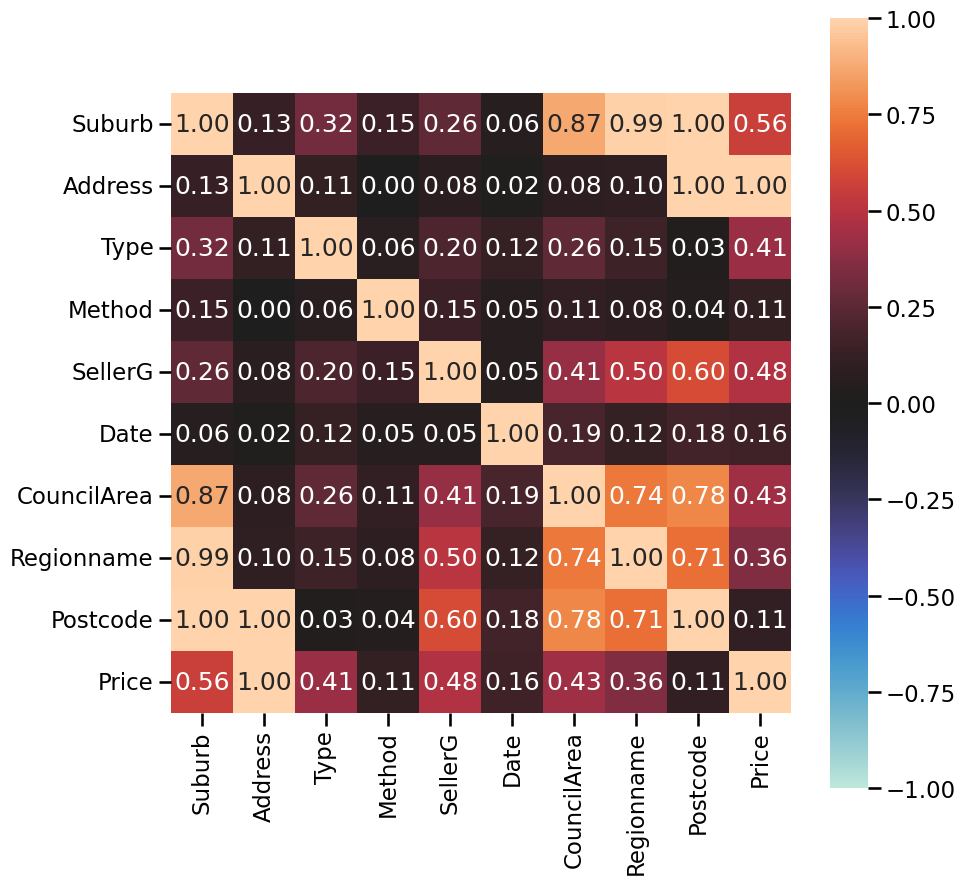

{'corr':                Suburb   Address      Type    Method   SellerG      Date  \
 Suburb       1.000000  0.126482  0.317440  0.147973  0.258384  0.062446   
 Address      0.126482  1.000000  0.111130  0.000000  0.077828  0.016182   
 Type         0.317440  0.111130  1.000000  0.064245  0.203200  0.124880   
 Method       0.147973  0.000000  0.064245  1.000000  0.145176  0.052238   
 SellerG      0.258384  0.077828  0.203200  0.145176  1.000000  0.050108   
 Date         0.062446  0.016182  0.124880  0.052238  0.050108  1.000000   
 CouncilArea  0.873973  0.083516  0.264013  0.109143  0.408350  0.192494   
 Regionname   0.988663  0.099809  0.153396  0.080390  0.503896  0.121483   
 Postcode     1.000000  0.996199  0.033861  0.043844  0.601802  0.175238   
 Price        0.559646  0.996781  0.414587  0.111624  0.478232  0.163071   
 
              CouncilArea  Regionname  Postcode     Price  
 Suburb          0.873973    0.988663  1.000000  0.559646  
 Address         0.083516    0.099

In [32]:
#Calculamos la Razón de correlacion entre las varibles categóricas y Price
associations(melb_df[categorical+['Postcode', 'Price']], nom_num_assoc='correlation_ratio', figsize=(10, 10))

**Interpretación**
       
En el caso del coeficiente $\eta$, se toma en cuenta la magnitud del resultado para indicar la proporción en la que una variable X explica la varianza en una variable Y, y se define en un rango que va de 0 a 1, siendo:

*	$0-0,3$ correlación baja.

*	$0,4-0,6$ correlación media.

*	$0,7-1$ correlación alta.

En base a lo expuesto anteriormente, miramos los valores de $\eta$ mayores a $0.4$ 

$\eta(\text{Price},\text{Suburb})= 0.56$

$\eta(\text{Price},\text{Address})= 1$

$\eta(\text{Price},\text{Type})= 0.41$

$\eta(\text{Price},\text{SellerG})= 0.48$

$\eta(\text{Price},\text{CouncilArea})= 0.43$

y optamos por las siguientes variables categóricas para la predicción del valor de la propiedad en Melbourne:

- Address.

- Suburb.

- SellerG.

- CouncilArea.

- Type.

In [33]:
interesting_columns_categ=['Address', 'Suburb', 'SellerG', 'CouncilArea', 'Type']

**Análisis de coeficiente de correlación muestral de Pearson para la elección de variables numéricas.**

In [34]:
#eliminamos la variable Postcode para el análisis de correlación porque la consideramos una variable categórica
melb_df_sin_Postcode=melb_df.copy()
melb_df_sin_Postcode=melb_df_sin_Postcode.drop('Postcode', axis=1) 

In [35]:
melb_df_sin_Postcode.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [36]:
mask = np.triu(np.ones_like(melb_df_sin_Postcode.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(round(melb_df_sin_Postcode.corr(),3), mask=mask, cmap=cmap,annot=True, center=0,
            square=True, linewidths=.5)

ValueError: could not convert string to float: 'Abbotsford'

**Análisis de coeficiente de correlación muestral de Pearson para la elección de variables numéricas.**

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)